<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Seyed Hamid Ghasemi

**Student ID**: 400109768


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

<font color='green'>Write down your answers as markdown here.</font>

# **1.**
The dual optimization problem for the Soft-Margin SVM without kernel can be derived as follows:

The primal optimization problem for the Soft-Margin SVM is:

\begin{align*}
\min_{w,b,\{\xi_i\}} \quad & \frac{1}{2}w^Tw + C \sum_{i=1}^m \xi_i \\
\text{s.t.} \quad & y_i(w^Tx_i + b) \geq 1 - \xi_i \\
& \xi_i \geq 0
\end{align*}

To derive the dual, we first form the Lagrangian:

\begin{align*}
L(w, b, \xi, \alpha, \mu) = \frac{1}{2}w^Tw + C \sum_{i=1}^m \xi_i - \sum_{i=1}^m \alpha_i[y_i(w^Tx_i + b) - 1 + \xi_i] - \sum_{i=1}^m \mu_i\xi_i
\end{align*}

where $\alpha_i$ and $\mu_i$ are the Lagrange multipliers.

Taking the derivatives with respect to $w$, $b$, and $\xi_i$ and setting them to 0, we get:

\begin{align*}
\frac{\partial L}{\partial w} &= w - \sum_{i=1}^m \alpha_iy_ix_i = 0 \\
\frac{\partial L}{\partial b} &= -\sum_{i=1}^m \alpha_iy_i = 0 \\
\frac{\partial L}{\partial \xi_i} &= C - \alpha_i - \mu_i = 0
\end{align*}

Substituting these back into the Lagrangian, we get the dual optimization problem:

\begin{align*}
\max_{\alpha} \quad & \sum_{i=1}^m \alpha_i - \frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m \alpha_i\alpha_jy_iy_jx_i^Tx_j \\
\text{s.t.} \quad & \sum_{i=1}^m \alpha_iy_i = 0 \\
& 0 \leq \alpha_i \leq C
\end{align*}

This is a quadratic programming problem that can be solved efficiently using techniques like Sequential Minimal Optimization (SMO). The key advantages of the dual formulation are:

1. It only depends on dot products of the feature vectors, allowing the use of the "kernel trick" to work in high-dimensional feature spaces.
2. The solution is sparse, with only a subset of the training examples (the support vectors) having non-zero Lagrange multipliers $\alpha_i$.


# **2.**
To calculate the weights and bias using the dual optimization problem for the Soft-Margin SVM, we can follow these steps:

1. Solve the dual optimization problem to find the optimal Lagrange multipliers α*:

\begin{align*}
\max_{\alpha} \quad & \sum_{i=1}^m \alpha_i - \frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m \alpha_i\alpha_jy_iy_jx_i^Tx_j \\
\text{s.t.} \quad & \sum_{i=1}^m \alpha_iy_i = 0 \\
& 0 \leq \alpha_i \leq C
\end{align*}

This can be solved using quadratic programming techniques like Sequential Minimal Optimization (SMO).

2. Compute the optimal weight vector w*:

\begin{align*}
w^* = \sum_{i=1}^m \alpha_i^*y_i x_i
\end{align*}

The weight vector w* is a linear combination of the training examples xi, weighted by the optimal Lagrange multipliers α*i and the corresponding labels yi.

3. Compute the optimal bias b*:

To find the optimal bias b*, we can use the Karush-Kuhn-Tucker (KKT) conditions. The KKT conditions state that for the optimal solution, the following must hold:

\begin{align*}
\alpha_i^*(y_i(w^{*T}x_i + b^*) - 1 + \xi_i^*) &= 0 \\
\xi_i^*(C - \alpha_i^*) &= 0
\end{align*}

From the first condition, we can see that for any training example i with 0 < α*i < C, we have:

\begin{align*}
y_i(w^{*T}x_i + b^*) = 1 - \xi_i^*
\end{align*}

Rearranging this equation, we can solve for the optimal bias b*:

\begin{align*}
b^* = \frac{1}{|S|}\sum_{i\in S}(y_i - w^{*T}x_i)
\end{align*}

where S is the set of indices of the support vectors (i.e., the training examples with 0 < α*i < C).


# **3.**
To classify new data points using the optimal weights and bias obtained from the dual optimization problem of the Soft-Margin SVM, we can follow these steps:

1. To classify a new data point x, compute the decision function:

\begin{align*}
f(x) = w^{*T}x + b^*
\end{align*}

2. Assign the class label to the new data point x based on the sign of f(x):

- If f(x) ≥ 0, then x is classified as belonging to the positive class (y = +1).
- If f(x) < 0, then x is classified as belonging to the negative class (y = -1).


Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [154]:
## YOUR CODE HERE

# Load the datasets
df1 = pd.read_csv('DF1.csv')
df2 = pd.read_csv('DF2.csv')
df3 = pd.read_csv('DF3.csv')

# Display the first 5 rows of each dataset
print("DF1:")
print(df1.head())
print("\nDF2:")
print(df2.head())
print("\nDF3:")
print(df3.head())

DF1:
         x1        x2  y
0  6.462652  5.121478 -1
1 -6.586541 -7.721287  1
2  9.239683 -8.595738 -1
3  4.250052  2.143755  1
4  8.219779 -3.609733 -1

DF2:
         x1         x2  y
0  2.937145  77.102291  1
1 -0.029344  44.802353  1
2  5.868818  44.595757 -1
3  8.609281  49.223945 -1
4  7.763276 -14.340750 -1

DF3:
         x1        x2  y
0 -0.517768 -0.466158 -1
1  0.940985  0.235175  1
2 -0.470720  0.917120  1
3  0.712716 -0.097401 -1
4 -0.608773 -0.107034 -1


Use the following function to visualize the datapoints for all datasets.

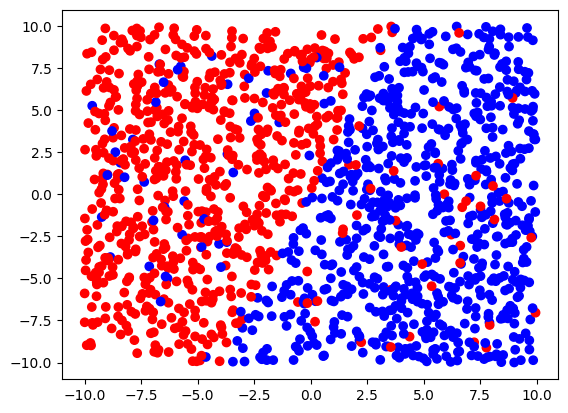

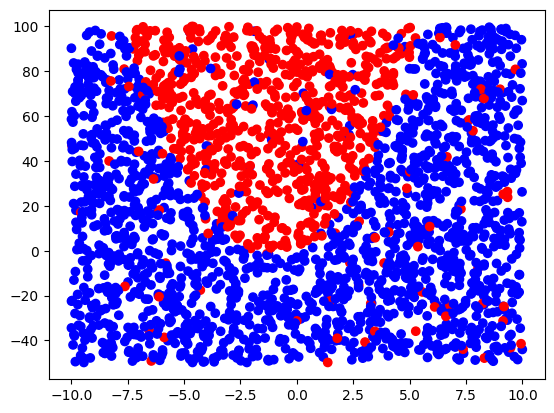

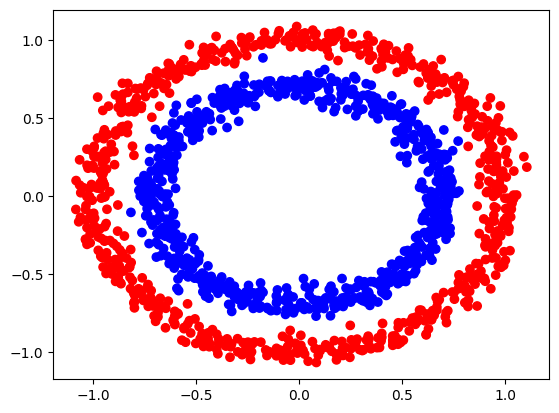

In [155]:
def visualize_data(X, y):
  col = []
  for i in range(len(y)):
    if y[i] == 1:
      col.append('red')
    else:
      col.append('blue')
  plt.scatter(X[ : , 0], X[ : , 1], color = col)
  plt.show()

## YOUR CODE HERE

# Visualize DF1
X = df1[['x1', 'x2']].values
y = df1['y'].values
visualize_data(X, y)

# Visualize DF2
X = df2[['x1', 'x2']].values
y = df2['y'].values
visualize_data(X, y)

# Visualize DF3
X = df3[['x1', 'x2']].values
y = df3['y'].values
visualize_data(X, y)


**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

<font color='green'>Write down your answers as markdown here.</font>

To determine which kernel to use for each dataset, we need to consider the characteristics of the data and the properties of the kernels. Here's an analysis of each kernel and its suitability for the given datasets:

1. **Linear Kernel**: $K(x, z) = x^T z$
   - The linear kernel is suitable when the data is linearly separable in the original feature space.
   - It assumes that the decision boundary can be represented by a hyperplane in the original feature space.
   - If the data is not linearly separable, the linear kernel may not be able to capture the complex relationships in the data.

2. **Polynomial Kernel of degree 2**: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$
   - The polynomial kernel of degree 2 can capture non-linear relationships in the data.
   - It introduces a quadratic term, allowing the SVM to learn more complex decision boundaries.
   - The degree of the polynomial kernel determines the complexity of the decision boundary. Higher degrees can capture more complex relationships but may lead to overfitting.

3. **RBF Kernel**: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$
   - The RBF (Radial Basis Function) kernel is a popular choice for many applications.
   - It can capture non-linear relationships and is suitable for high-dimensional feature spaces.
   - The parameter σ controls the width of the Gaussian function and determines the influence of each training example. A smaller σ leads to a more complex decision boundary, while a larger σ results in a smoother decision boundary.

Now, let's analyze which kernel might be suitable for each dataset:

**DF1**:

the data in DF1 is linearly separable, the **linear kernel** might be a good choice as it is simple and computationally efficient.


**DF2**:

Based on the characteristics of the DF2 dataset, which is having a complex 2D boundary, the most suitable kernel for this dataset would likely be the **RBF (Radial Basis Function) kernel**.

The RBF kernel is defined as:

$$K(x, z) = e^{-\frac{||x-z||_2^2}{2\sigma^2}}$$

The RBF kernel is a popular choice for datasets with non-linear and complex relationships, as it can capture a wide range of non-linear patterns. The complex boundary of the DF2 dataset suggests that the data is not linearly separable, and a non-linear kernel would be more appropriate.

Therefore, the RBF kernel is the most suitable choice for the DF2 dataset, as it can effectively capture the non-linear, complex structure of the data and provide a flexible decision boundary.



**DF3**:

the **polynomial kernel of degree 2** can be a suitable choice for the DF3 dataset, which is having a circular 2D form, when the RBF kernel is not available.
For the circular DF3 dataset, the polynomial kernel of degree 2 may be able to capture some of the non-linear, circular patterns in the data, even though it may not be as flexible as the RBF kernel.





## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [156]:
## YOUR CODE HERE
# Split the dataset into train and test sets (20% for test)
X1 = df1[['x1', 'x2']].values
y1 = df1['y'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# normalize the data
scaler = StandardScaler()
X1_train_normalized = scaler.fit_transform(X1_train)
X1_test_normalized = scaler.transform(X1_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [158]:
## YOUR CODE HERE
def linear_kernel(x,z):
  return x.T @ z

def solve_dual_svm_linear_kernel(X, y, C):
    n = X.shape[0]
    alpha = cp.Variable(n)

    S = np.zeros([n,n])

    # Compute the S matrix
    for i in range(n):
      for j in range(n):
        S[i][j] = y[i]*y[j]*(linear_kernel(X[i], X[j]))
    #print(S)
    S = cp.psd_wrap(S)
    #print()
    #print(S)

    # Construct the dual optimization problem
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, S))
    constraints = [cp.sum(cp.multiply(y, alpha)) == 0, 0 <= alpha, alpha <= C]

    # Solve the dual optimization problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return alpha.value

In [159]:
C1 = 0.1
alpha1 = solve_dual_svm_linear_kernel(X1_train_normalized, y1_train, C1)

Predict the class of each entry in the test set using your learned model.

In [160]:
## YOUR CODE HERE
def calc_b_linear (alpha, X, y,C):
  sv_idx = np.where((alpha >= 1e-4) & (alpha < (C)))[0]
  #print(alpha[sv_idx])
  n = len(sv_idx)
  b = 0
  for i in sv_idx:
    temp = 0
    for j in sv_idx:
      temp += alpha[j] * y[j] * (linear_kernel(X[i],X[j]))

    b += (y[i] - temp)

  return b/n

def predict_linear_kernel (alpha, X_train, y_train, x_test, bias):
  sv_idx = np.where(alpha >= 1e-5)[0]
  n = len(sv_idx)

  temp = 0
  for i in sv_idx:
    temp += alpha[i] * y_train[i] * (linear_kernel(X_train[i],x_test))

  return np.sign(temp + bias)

In [162]:
b1 = calc_b_linear(alpha1, X1_train_normalized, y1_train,C1)
y1_predicted = np.zeros(len(y1_test))

for i in range(len(y1_predicted)):
  y1_predicted[i] = predict_linear_kernel(alpha1, X1_train_normalized, y1_train, X1_test_normalized[i], b1)
  #print("y1_predicted[i]=",y1_predicted[i],"|| y1_test=",y1_test[i])

visualize original X1_test_normalized:


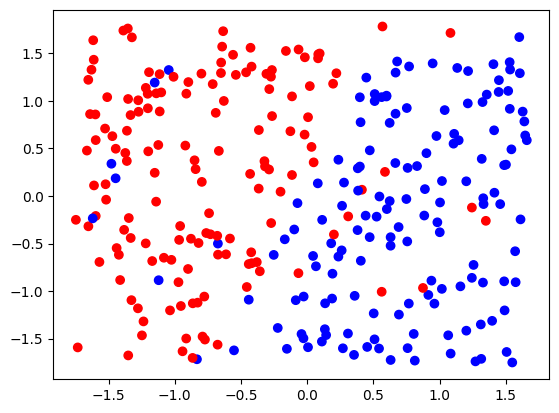

In [164]:
print("visualize original X1_test_normalized:")
visualize_data(X1_test_normalized, y1_test)

visualize predicted X1_test_normalized:


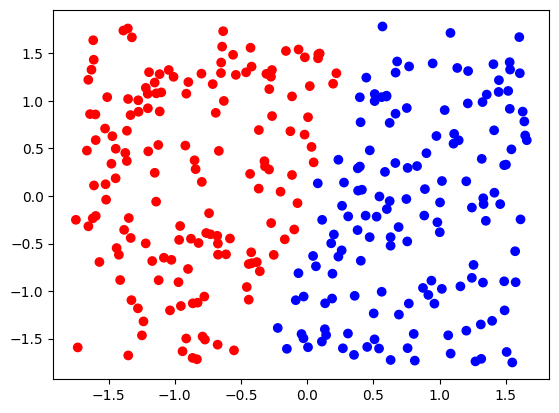

In [165]:
print("visualize predicted X1_test_normalized:")
visualize_data(X1_test_normalized, y1_predicted)

Use classification_report function (from sklearn) to get the accuracy of your model.

In [166]:
## YOUR CODE HERE
# Compute the classification report
report = classification_report(y1_test, y1_predicted)
print(report)

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91       148
           1       0.91      0.93      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [169]:
## YOUR CODE HERE
# Split the dataset into train and test sets (20% for test)
X2 = df2[['x1', 'x2']].values
y2 = df2['y'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# normalize the data
scaler = StandardScaler()
X2_train_normalized = scaler.fit_transform(X2_train)
X2_test_normalized = scaler.transform(X2_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [170]:
## YOUR CODE HERE
def rbf_kernel(x,z,sigma):
  res = np.exp(-1 * (np.linalg.norm(x - z) ** 2) / (2 * sigma**2))
  return res

def solve_dual_svm_rbf_kernel(X, y, C, sigma):
    n = X.shape[0]
    alpha = cp.Variable(n)

    S = np.zeros([n,n])

    # Compute the S matrix
    for i in range(n):
      for j in range(n):
        S[i][j] = y[i]*y[j]*(rbf_kernel(X[i],X[j],sigma))
    #print(S)
    S = cp.psd_wrap(S)
    #print()
    #print(S)

    # Construct the dual optimization problem
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, S))
    constraints = [cp.sum(cp.multiply(y, alpha)) == 0, 0 <= alpha, alpha <= C]

    # Solve the dual optimization problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return alpha.value

In [171]:
C2 = 10
sigma = 1
alpha2 = solve_dual_svm_rbf_kernel(X2_train_normalized, y2_train, C2, sigma)

Predict the class of each entry in the test set using your learned model.

In [172]:
## YOUR CODE HERE

def calc_b_rbf (alpha, X, y,C, sigma):
  sv_idx = np.where((alpha >= 1e-4))[0]
  #print(alpha[sv_idx])
  n = len(sv_idx)
  b = 0
  for i in sv_idx:
    temp = 0
    for j in sv_idx:
      temp += alpha[j] * y[j] * (rbf_kernel(X[i],X[j], sigma))

    b += (y[i] - temp)

  return b/n

def predict_rbf_kernel (alpha, X_train, y_train, x_test, bias, sigma):
  sv_idx = np.where(alpha >= 1e-5)[0]
  n = len(sv_idx)
  #print(sv_idx)

  temp = 0
  for i in sv_idx:
    #print(i)
    temp += alpha[i] * y_train[i] * (rbf_kernel(X_train[i],x_test, sigma))

  return np.sign(temp + bias)

In [173]:
b2 = calc_b_rbf(alpha2, X2_train_normalized, y2_train, C2, sigma)
y2_predicted = np.zeros(len(y2_test))

for i in range(len(y2_predicted)):
  y2_predicted[i] = predict_rbf_kernel(alpha2, X2_train_normalized, y2_train, X2_test_normalized[i], b2, sigma)
  #print("y1_predicted[i]=",y1_predicted[i],"|| y1_test=",y1_test[i])

visualize original X2_test_normalized:


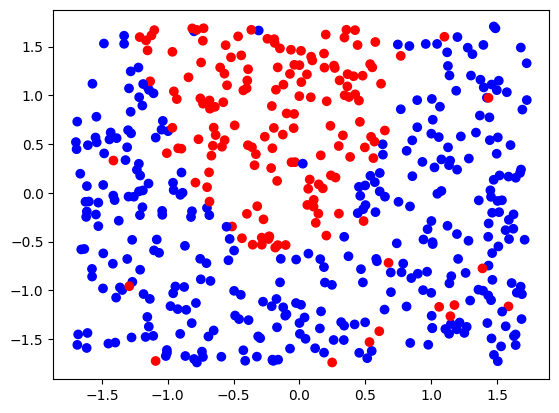

In [175]:
print("visualize original X2_test_normalized:")
visualize_data(X2_test_normalized, y2_test)

visualize predicted X2_test_normalized:


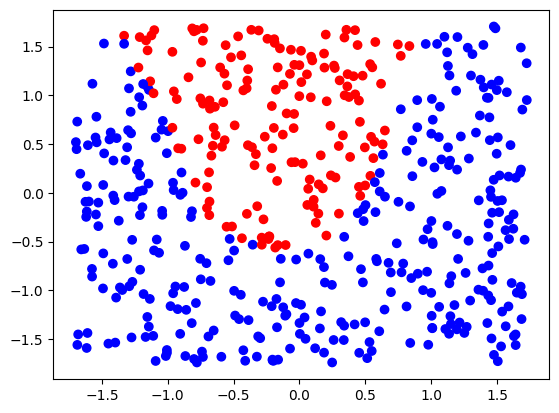

In [176]:
print("visualize predicted X2_test_normalized:")
visualize_data(X2_test_normalized, y2_predicted)

Use classification_report function (from sklearn) to get the accuracy of your model.

In [177]:
## YOUR CODE HERE

# Compute the classification report
report2 = classification_report(y2_test, y2_predicted)
print(report2)

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       336
           1       0.90      0.89      0.90       160

    accuracy                           0.93       496
   macro avg       0.92      0.92      0.92       496
weighted avg       0.93      0.93      0.93       496



## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [179]:
## YOUR CODE HERE

# Split the dataset into train and test sets (20% for test)
X3 = df3[['x1', 'x2']].values
y3 = df3['y'].values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# normalize the data
scaler = StandardScaler()
X3_train_normalized = scaler.fit_transform(X3_train)
X3_test_normalized = scaler.transform(X3_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [180]:
## YOUR CODE HERE
def poly2_kernel(x,z):
  res = (1 + x.T @ z) ** 2
  return res

def solve_dual_svm_poly2_kernel(X, y, C):
    n = X.shape[0]
    alpha = cp.Variable(n)

    S = np.zeros([n,n])

    # Compute the S matrix
    for i in range(n):
      for j in range(n):
        S[i][j] = y[i]*y[j]*(poly2_kernel(X[i],X[j]))
    #print(S)
    S = cp.psd_wrap(S)
    #print()
    #print(S)

    # Construct the dual optimization problem
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, S))
    constraints = [cp.sum(cp.multiply(y, alpha)) == 0, 0 <= alpha, alpha <= C]

    # Solve the dual optimization problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return alpha.value

In [181]:
C3 = 1
alpha3 = solve_dual_svm_poly2_kernel(X3_train_normalized, y3_train, C3)

Predict the class of each entry in the test set using your learned model.

In [182]:
## YOUR CODE HERE

def calc_b_poly2 (alpha, X, y, C):
  sv_idx = np.where((alpha >= 1e-4))[0]
  #print(alpha[sv_idx])
  n = len(sv_idx)
  b = 0
  for i in sv_idx:
    temp = 0
    for j in sv_idx:
      temp += alpha[j] * y[j] * (poly2_kernel(X[i],X[j]))

    b += (y[i] - temp)

  return b/n

def predict_poly2_kernel (alpha, X_train, y_train, x_test, bias):
  sv_idx = np.where(alpha >= 1e-5)[0]
  n = len(sv_idx)
  #print(sv_idx)

  temp = 0
  for i in sv_idx:
    #print(i)
    temp += alpha[i] * y_train[i] * (poly2_kernel(X_train[i],x_test))

  return np.sign(temp + bias)

In [183]:
b3 = calc_b_poly2(alpha3, X3_train_normalized, y3_train, C3)
y3_predicted = np.zeros(len(y3_test))

for i in range(len(y3_predicted)):
  y3_predicted[i] = predict_poly2_kernel(alpha3, X3_train_normalized, y3_train, X3_test_normalized[i], b3)
  #print("y1_predicted[i]=",y1_predicted[i],"|| y1_test=",y1_test[i])

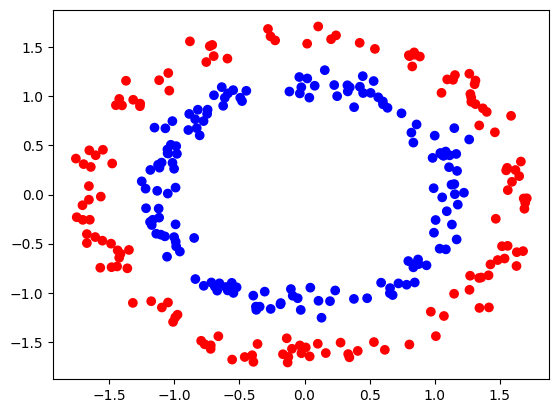

In [184]:
visualize_data(X3_test_normalized, y3_test)

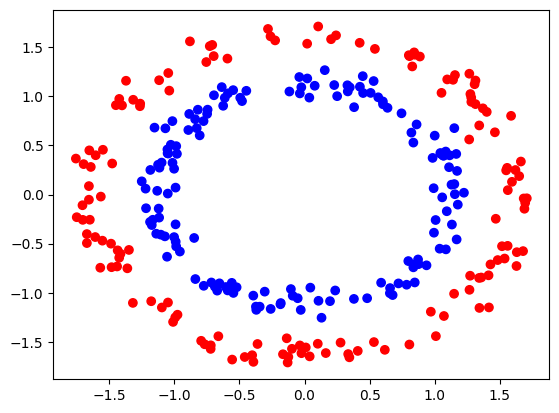

In [185]:
visualize_data(X3_test_normalized, y3_predicted)

Use classification_report function (from sklearn) to get the accuracy of your model.

In [186]:
## YOUR CODE HERE

# Compute the classification report
report3 = classification_report(y3_test, y3_predicted)
print(report3)

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



# **The sum of the accuracies is equal to : 1+0.93+0.92= 2.85**